In [1]:
# generic imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
# notebook settings
%config IPCompleter.greedy=True
%load_ext autoreload
%autoreload 2 
# precision and plot settings
num_precision = 3
np.set_printoptions(precision=num_precision, suppress=True)
pd.set_option('display.float_format', lambda x: f'{x:,.{num_precision}f}')
pd.set_option("display.precision", num_precision)
pd.set_option('display.max_columns', None)

plt.style.use('tableau-colorblind10')
plt.rcParams['figure.figsize'] = [10, 6]
plt.rcParams['font.size'] = 16
plt.rcParams['legend.fontsize'] = 'large'
plt.rcParams['figure.titlesize'] = 'medium'
plt.rcParams['lines.linewidth'] = 2

In [2]:
import random, time
import googlemaps

In [3]:
# setup dir and import helper functions
import sys, os
sys.path.append(os.path.join(os.path.dirname(sys.path[0]),'src'))
import helper_funcs as my_funcs

In [78]:
# US, 7 categories
closed = pd.read_csv('../data/iOverlander Places -  closed US 7 cats 2020-09-14.csv')
deleted = pd.read_csv('../data/iOverlander Places - US deleted 2020-09-14.csv')
clos_del = pd.read_csv('../data/iOverlander Places - closed and deleted 2020-09-14.csv')

In [5]:
closed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 681 entries, 0 to 680
Data columns (total 36 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Location                   154 non-null    object 
 1   Name                       681 non-null    object 
 2   Category                   681 non-null    object 
 3   Description                681 non-null    object 
 4   Latitude                   681 non-null    float64
 5   Longitude                  681 non-null    float64
 6   Altitude                   670 non-null    float64
 7   Date verified              681 non-null    object 
 8   Open                       681 non-null    object 
 9   Electricity                661 non-null    object 
 10  Wifi                       661 non-null    object 
 11  Kitchen                    661 non-null    object 
 12  Parking                    0 non-null      float64
 13  Restaurant                 661 non-null    object 

In [79]:
dfs = [closed, deleted, clos_del]

In [7]:
# are these unique?
clos_set = set(closed['Name'])
del_set = set(deleted['Name'])
clos_del_set = set(clos_del['Name'])

In [8]:
clos_set.intersection(del_set)

{'Albertsons',
 'Cabellas',
 'Camping World',
 'Dead end road',
 'Parking for overnight',
 'Parking lot ',
 'Planet Fitness ',
 'Rest Area',
 'Rest area',
 'Saddle Mountain',
 'Street parking ',
 'Super Walmart ',
 'Walmart',
 'Walmart ',
 'Walmart Supercenter',
 'Walmart camping',
 'Walmart parking lot',
 'walmart'}

In [9]:
closed['latlong'] = closed['Latitude'].astype('str') + '_' + closed['Longitude'].astype('str')

In [10]:
def foo(df):
    df['latlong'] = df['Latitude'].astype('str') + '_' + df['Longitude'].astype('str')
    return df

In [11]:
dfs2 = [df.pipe(foo) for df in dfs]

In [12]:
# are these unique?
clos_set = set(dfs2[0]['latlong'])
del_set = set(dfs2[1]['latlong'])
clos_del_set = set(dfs2[2]['latlong'])

In [13]:
clos_set & del_set & clos_del_set

set()

In [14]:
# get states and zips for them
# setup API
G_MAPS_API = os.environ.get("GOOGLE_STATICMAPS_API")
gmaps = googlemaps.Client(G_MAPS_API)
n_requests = 0

In [80]:
names = ['closed', 'deleted', 'closed_deleted']

In [16]:
len(dfs)

3

In [17]:
dfs[0].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 681 entries, 0 to 680
Data columns (total 37 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Location                   154 non-null    object 
 1   Name                       681 non-null    object 
 2   Category                   681 non-null    object 
 3   Description                681 non-null    object 
 4   Latitude                   681 non-null    float64
 5   Longitude                  681 non-null    float64
 6   Altitude                   670 non-null    float64
 7   Date verified              681 non-null    object 
 8   Open                       681 non-null    object 
 9   Electricity                661 non-null    object 
 10  Wifi                       661 non-null    object 
 11  Kitchen                    661 non-null    object 
 12  Parking                    0 non-null      float64
 13  Restaurant                 661 non-null    object 

In [18]:
for name, df in zip(names, dfs):
    zips, states = my_funcs.get_state_zip(df, gmaps, n_requests)
    zips_pd = pd.Series(zips, name='zip_codes') 
    states_pd = pd.Series(states, name='states') 
    zips_pd.to_csv(f'../data/zip_codes_{name}.csv')
    states_pd.to_csv(f'../data/states_{name}.csv')

Pulling request 0, total API requests so far = 0
waiting for: 1 seconds
Pulling request 1, total API requests so far = 1
waiting for: 3 seconds
Pulling request 2, total API requests so far = 2
waiting for: 3 seconds
Pulling request 3, total API requests so far = 3
waiting for: 3 seconds
Pulling request 4, total API requests so far = 4
waiting for: 3 seconds
Pulling request 5, total API requests so far = 5
waiting for: 2 seconds
Pulling request 6, total API requests so far = 6
waiting for: 3 seconds
Pulling request 7, total API requests so far = 7
waiting for: 3 seconds
Pulling request 8, total API requests so far = 8
waiting for: 2 seconds
Pulling request 9, total API requests so far = 9
waiting for: 1 seconds
Pulling request 10, total API requests so far = 10
waiting for: 3 seconds
Pulling request 11, total API requests so far = 11
waiting for: 3 seconds
Pulling request 12, total API requests so far = 12
waiting for: 1 seconds
Pulling request 13, total API requests so far = 13
waiting

Pulling request 111, total API requests so far = 111
waiting for: 3 seconds
Pulling request 112, total API requests so far = 112
waiting for: 1 seconds
Pulling request 113, total API requests so far = 113
waiting for: 1 seconds
Pulling request 114, total API requests so far = 114
waiting for: 3 seconds
Pulling request 115, total API requests so far = 115
waiting for: 2 seconds
Pulling request 116, total API requests so far = 116
waiting for: 3 seconds
Pulling request 117, total API requests so far = 117
waiting for: 1 seconds
Pulling request 118, total API requests so far = 118
waiting for: 3 seconds
Pulling request 119, total API requests so far = 119
waiting for: 2 seconds
Pulling request 120, total API requests so far = 120
waiting for: 3 seconds
Pulling request 121, total API requests so far = 121
waiting for: 1 seconds
Pulling request 122, total API requests so far = 122
waiting for: 3 seconds
Pulling request 123, total API requests so far = 123
waiting for: 2 seconds
Pulling requ

Pulling request 219, total API requests so far = 219
waiting for: 2 seconds
Pulling request 220, total API requests so far = 220
waiting for: 3 seconds
Pulling request 221, total API requests so far = 221
waiting for: 2 seconds
Pulling request 222, total API requests so far = 222
waiting for: 2 seconds
Pulling request 223, total API requests so far = 223
waiting for: 3 seconds
Pulling request 224, total API requests so far = 224
waiting for: 1 seconds
Pulling request 225, total API requests so far = 225
waiting for: 2 seconds
Pulling request 226, total API requests so far = 226
waiting for: 1 seconds
Pulling request 227, total API requests so far = 227
waiting for: 3 seconds
Pulling request 228, total API requests so far = 228
waiting for: 3 seconds
Pulling request 229, total API requests so far = 229
waiting for: 2 seconds
Pulling request 230, total API requests so far = 230
waiting for: 1 seconds
Pulling request 231, total API requests so far = 231
waiting for: 2 seconds
Pulling requ

Pulling request 327, total API requests so far = 327
waiting for: 1 seconds
Pulling request 328, total API requests so far = 328
waiting for: 2 seconds
Pulling request 329, total API requests so far = 329
waiting for: 3 seconds
Pulling request 330, total API requests so far = 330
waiting for: 2 seconds
Pulling request 331, total API requests so far = 331
waiting for: 1 seconds
Pulling request 332, total API requests so far = 332
waiting for: 2 seconds
Pulling request 333, total API requests so far = 333
waiting for: 2 seconds
Pulling request 334, total API requests so far = 334
waiting for: 2 seconds
Pulling request 335, total API requests so far = 335
waiting for: 2 seconds
Pulling request 336, total API requests so far = 336
waiting for: 2 seconds
Pulling request 337, total API requests so far = 337
waiting for: 2 seconds
Pulling request 338, total API requests so far = 338
waiting for: 2 seconds
Pulling request 339, total API requests so far = 339
waiting for: 3 seconds
Pulling requ

Pulling request 435, total API requests so far = 435
waiting for: 1 seconds
Pulling request 436, total API requests so far = 436
waiting for: 1 seconds
Pulling request 437, total API requests so far = 437
waiting for: 3 seconds
Pulling request 438, total API requests so far = 438
waiting for: 3 seconds
Pulling request 439, total API requests so far = 439
waiting for: 1 seconds
Pulling request 440, total API requests so far = 440
waiting for: 1 seconds
Pulling request 441, total API requests so far = 441
waiting for: 1 seconds
Pulling request 442, total API requests so far = 442
waiting for: 2 seconds
Pulling request 443, total API requests so far = 443
waiting for: 3 seconds
Pulling request 444, total API requests so far = 444
waiting for: 1 seconds
Pulling request 445, total API requests so far = 445
waiting for: 1 seconds
Pulling request 446, total API requests so far = 446
waiting for: 2 seconds
Pulling request 447, total API requests so far = 447
waiting for: 1 seconds
Pulling requ

Pulling request 543, total API requests so far = 543
waiting for: 2 seconds
Pulling request 544, total API requests so far = 544
waiting for: 3 seconds
Pulling request 545, total API requests so far = 545
waiting for: 2 seconds
Pulling request 546, total API requests so far = 546
waiting for: 2 seconds
Pulling request 547, total API requests so far = 547
waiting for: 2 seconds
Pulling request 548, total API requests so far = 548
waiting for: 2 seconds
Pulling request 549, total API requests so far = 549
waiting for: 2 seconds
Pulling request 550, total API requests so far = 550
waiting for: 1 seconds
Pulling request 551, total API requests so far = 551
waiting for: 3 seconds
Pulling request 552, total API requests so far = 552
waiting for: 1 seconds
Pulling request 553, total API requests so far = 553
waiting for: 1 seconds
Pulling request 554, total API requests so far = 554
waiting for: 2 seconds
Pulling request 555, total API requests so far = 555
waiting for: 2 seconds
Pulling requ

Pulling request 651, total API requests so far = 651
waiting for: 2 seconds
Pulling request 652, total API requests so far = 652
waiting for: 3 seconds
Pulling request 653, total API requests so far = 653
waiting for: 1 seconds
Pulling request 654, total API requests so far = 654
waiting for: 1 seconds
Pulling request 655, total API requests so far = 655
waiting for: 3 seconds
Pulling request 656, total API requests so far = 656
waiting for: 2 seconds
Pulling request 657, total API requests so far = 657
waiting for: 2 seconds
Pulling request 658, total API requests so far = 658
waiting for: 1 seconds
Pulling request 659, total API requests so far = 659
waiting for: 3 seconds
Pulling request 660, total API requests so far = 660
waiting for: 3 seconds
Pulling request 661, total API requests so far = 661
waiting for: 2 seconds
Pulling request 662, total API requests so far = 662
waiting for: 1 seconds
Pulling request 663, total API requests so far = 663
waiting for: 3 seconds
Pulling requ

Pulling request 81, total API requests so far = 81
waiting for: 3 seconds
Pulling request 82, total API requests so far = 82
waiting for: 3 seconds
Pulling request 83, total API requests so far = 83
waiting for: 3 seconds
Pulling request 84, total API requests so far = 84
waiting for: 3 seconds
Pulling request 85, total API requests so far = 85
waiting for: 2 seconds
Pulling request 86, total API requests so far = 86
waiting for: 3 seconds
Pulling request 87, total API requests so far = 87
waiting for: 2 seconds
Pulling request 88, total API requests so far = 88
waiting for: 2 seconds
Pulling request 89, total API requests so far = 89
waiting for: 3 seconds
Pulling request 90, total API requests so far = 90
waiting for: 3 seconds
Pulling request 91, total API requests so far = 91
waiting for: 3 seconds
Pulling request 92, total API requests so far = 92
waiting for: 2 seconds
Pulling request 93, total API requests so far = 93
waiting for: 3 seconds
Pulling request 94, total API requests

Pulling request 190, total API requests so far = 190
waiting for: 1 seconds
Pulling request 191, total API requests so far = 191
waiting for: 2 seconds
Pulling request 192, total API requests so far = 192
waiting for: 1 seconds
Pulling request 193, total API requests so far = 193
waiting for: 2 seconds
Pulling request 194, total API requests so far = 194
waiting for: 1 seconds
Pulling request 195, total API requests so far = 195
waiting for: 1 seconds
Pulling request 196, total API requests so far = 196
waiting for: 1 seconds
Pulling request 197, total API requests so far = 197
waiting for: 2 seconds
Pulling request 198, total API requests so far = 198
waiting for: 2 seconds
Pulling request 199, total API requests so far = 199
waiting for: 1 seconds
Pulling request 200, total API requests so far = 200
waiting for: 3 seconds
Pulling request 201, total API requests so far = 201
waiting for: 1 seconds
Pulling request 202, total API requests so far = 202
waiting for: 1 seconds
Pulling requ

Pulling request 298, total API requests so far = 298
waiting for: 3 seconds
Pulling request 299, total API requests so far = 299
waiting for: 1 seconds
Pulling request 300, total API requests so far = 300
waiting for: 1 seconds
Pulling request 301, total API requests so far = 301
waiting for: 2 seconds
Pulling request 302, total API requests so far = 302
waiting for: 3 seconds
Pulling request 303, total API requests so far = 303
waiting for: 3 seconds
Pulling request 304, total API requests so far = 304
waiting for: 3 seconds
Pulling request 305, total API requests so far = 305
waiting for: 1 seconds
Pulling request 306, total API requests so far = 306
waiting for: 2 seconds
Pulling request 307, total API requests so far = 307
waiting for: 1 seconds
Pulling request 308, total API requests so far = 308
waiting for: 1 seconds
Pulling request 309, total API requests so far = 309
waiting for: 1 seconds
Pulling request 310, total API requests so far = 310
waiting for: 1 seconds
Pulling requ

Pulling request 406, total API requests so far = 406
waiting for: 3 seconds
Pulling request 407, total API requests so far = 407
waiting for: 3 seconds
Pulling request 408, total API requests so far = 408
waiting for: 3 seconds
Pulling request 409, total API requests so far = 409
waiting for: 1 seconds
Pulling request 410, total API requests so far = 410
waiting for: 1 seconds
Pulling request 411, total API requests so far = 411
waiting for: 2 seconds
Pulling request 412, total API requests so far = 412
waiting for: 3 seconds
Pulling request 413, total API requests so far = 413
waiting for: 2 seconds
Pulling request 414, total API requests so far = 414
waiting for: 2 seconds
Pulling request 415, total API requests so far = 415
waiting for: 1 seconds
Pulling request 416, total API requests so far = 416
waiting for: 2 seconds
Pulling request 417, total API requests so far = 417
waiting for: 1 seconds
Pulling request 418, total API requests so far = 418
waiting for: 3 seconds
Pulling requ

Pulling request 514, total API requests so far = 514
waiting for: 1 seconds
Pulling request 515, total API requests so far = 515
waiting for: 1 seconds
Pulling request 516, total API requests so far = 516
waiting for: 2 seconds
Pulling request 517, total API requests so far = 517
waiting for: 1 seconds
Pulling request 518, total API requests so far = 518
waiting for: 1 seconds
Pulling request 519, total API requests so far = 519
waiting for: 1 seconds
Pulling request 520, total API requests so far = 520
waiting for: 1 seconds
Pulling request 521, total API requests so far = 521
waiting for: 2 seconds
Pulling request 522, total API requests so far = 522
waiting for: 1 seconds
Pulling request 523, total API requests so far = 523
waiting for: 2 seconds
Pulling request 524, total API requests so far = 524
waiting for: 2 seconds
Pulling request 525, total API requests so far = 525
waiting for: 2 seconds
Pulling request 526, total API requests so far = 526
waiting for: 1 seconds
Pulling requ

Pulling request 622, total API requests so far = 622
waiting for: 2 seconds
Pulling request 623, total API requests so far = 623
waiting for: 2 seconds
Pulling request 624, total API requests so far = 624
waiting for: 1 seconds
Pulling request 625, total API requests so far = 625
waiting for: 3 seconds
Pulling request 626, total API requests so far = 626
waiting for: 2 seconds
Pulling request 627, total API requests so far = 627
waiting for: 3 seconds
Pulling request 628, total API requests so far = 628
waiting for: 3 seconds
Pulling request 629, total API requests so far = 629
waiting for: 2 seconds
Pulling request 630, total API requests so far = 630
waiting for: 2 seconds
Pulling request 631, total API requests so far = 631
waiting for: 2 seconds
Pulling request 632, total API requests so far = 632
waiting for: 2 seconds
Pulling request 633, total API requests so far = 633
waiting for: 3 seconds
Pulling request 634, total API requests so far = 634
waiting for: 2 seconds
Pulling requ

Pulling request 730, total API requests so far = 730
waiting for: 3 seconds
Pulling request 731, total API requests so far = 731
waiting for: 2 seconds
Pulling request 732, total API requests so far = 732
waiting for: 2 seconds
Pulling request 733, total API requests so far = 733
waiting for: 2 seconds
Pulling request 734, total API requests so far = 734
waiting for: 2 seconds
Pulling request 735, total API requests so far = 735
waiting for: 3 seconds
Pulling request 736, total API requests so far = 736
waiting for: 2 seconds
Pulling request 737, total API requests so far = 737
waiting for: 2 seconds
Pulling request 738, total API requests so far = 738
waiting for: 3 seconds
Pulling request 739, total API requests so far = 739
waiting for: 2 seconds
Pulling request 740, total API requests so far = 740
waiting for: 2 seconds
Pulling request 741, total API requests so far = 741
waiting for: 3 seconds
Pulling request 742, total API requests so far = 742
waiting for: 1 seconds
Pulling requ

Pulling request 838, total API requests so far = 838
waiting for: 1 seconds
Pulling request 839, total API requests so far = 839
waiting for: 2 seconds
Pulling request 840, total API requests so far = 840
waiting for: 3 seconds
Pulling request 841, total API requests so far = 841
waiting for: 2 seconds
Pulling request 842, total API requests so far = 842
waiting for: 1 seconds
Pulling request 843, total API requests so far = 843
waiting for: 3 seconds
Pulling request 844, total API requests so far = 844
waiting for: 2 seconds
Pulling request 845, total API requests so far = 845
waiting for: 1 seconds
Pulling request 846, total API requests so far = 846
waiting for: 3 seconds
Pulling request 847, total API requests so far = 847
waiting for: 1 seconds
Pulling request 848, total API requests so far = 848
waiting for: 3 seconds
Pulling request 849, total API requests so far = 849
waiting for: 2 seconds
Pulling request 850, total API requests so far = 850
waiting for: 1 seconds
Pulling requ

Pulling request 90, total API requests so far = 90
waiting for: 3 seconds
Pulling request 91, total API requests so far = 91
waiting for: 1 seconds
Pulling request 92, total API requests so far = 92
waiting for: 2 seconds
Pulling request 93, total API requests so far = 93
waiting for: 1 seconds
Pulling request 94, total API requests so far = 94
waiting for: 2 seconds
Pulling request 95, total API requests so far = 95
waiting for: 2 seconds
Pulling request 96, total API requests so far = 96
waiting for: 1 seconds
Pulling request 97, total API requests so far = 97
waiting for: 1 seconds
Pulling request 98, total API requests so far = 98
waiting for: 1 seconds
Pulling request 99, total API requests so far = 99
waiting for: 3 seconds
Pulling request 100, total API requests so far = 100
waiting for: 3 seconds
Pulling request 101, total API requests so far = 101
waiting for: 2 seconds
Pulling request 102, total API requests so far = 102
waiting for: 3 seconds
Pulling request 103, total API r

Pulling request 199, total API requests so far = 199
waiting for: 3 seconds
Pulling request 200, total API requests so far = 200
waiting for: 3 seconds
Pulling request 201, total API requests so far = 201
waiting for: 3 seconds
Pulling request 202, total API requests so far = 202
waiting for: 2 seconds
Pulling request 203, total API requests so far = 203
waiting for: 1 seconds
Pulling request 204, total API requests so far = 204
waiting for: 1 seconds
Pulling request 205, total API requests so far = 205
waiting for: 1 seconds
Pulling request 206, total API requests so far = 206
waiting for: 2 seconds
Pulling request 207, total API requests so far = 207
waiting for: 1 seconds
Pulling request 208, total API requests so far = 208
waiting for: 1 seconds
Pulling request 209, total API requests so far = 209
waiting for: 2 seconds
Pulling request 210, total API requests so far = 210
waiting for: 1 seconds
Pulling request 211, total API requests so far = 211
waiting for: 2 seconds
Pulling requ

Pulling request 307, total API requests so far = 307
waiting for: 3 seconds
Pulling request 308, total API requests so far = 308
waiting for: 2 seconds
Pulling request 309, total API requests so far = 309
waiting for: 2 seconds
Pulling request 310, total API requests so far = 310
waiting for: 1 seconds
Pulling request 311, total API requests so far = 311
waiting for: 1 seconds
Pulling request 312, total API requests so far = 312
waiting for: 2 seconds
Pulling request 313, total API requests so far = 313
waiting for: 2 seconds
Pulling request 314, total API requests so far = 314
waiting for: 1 seconds
Pulling request 315, total API requests so far = 315
waiting for: 2 seconds
Pulling request 316, total API requests so far = 316
waiting for: 2 seconds
Pulling request 317, total API requests so far = 317
waiting for: 3 seconds
Pulling request 318, total API requests so far = 318
waiting for: 1 seconds
Pulling request 319, total API requests so far = 319
waiting for: 1 seconds
Pulling requ

Pulling request 415, total API requests so far = 415
waiting for: 3 seconds
Pulling request 416, total API requests so far = 416
waiting for: 3 seconds
Pulling request 417, total API requests so far = 417
waiting for: 2 seconds
Pulling request 418, total API requests so far = 418
waiting for: 2 seconds
Pulling request 419, total API requests so far = 419
waiting for: 3 seconds
Pulling request 420, total API requests so far = 420
waiting for: 3 seconds
Pulling request 421, total API requests so far = 421
waiting for: 3 seconds
Pulling request 422, total API requests so far = 422
waiting for: 1 seconds
Pulling request 423, total API requests so far = 423
waiting for: 2 seconds
Pulling request 424, total API requests so far = 424
waiting for: 1 seconds
Pulling request 425, total API requests so far = 425
waiting for: 1 seconds
Pulling request 426, total API requests so far = 426
waiting for: 1 seconds
Pulling request 427, total API requests so far = 427
waiting for: 1 seconds
Pulling requ

In [81]:
# add the new data as new cols in each
for name, df in zip(names, dfs):
    zips = pd.read_csv(f'../data/zip_codes_{name}.csv').drop('Unnamed: 0',axis=1)
    states = pd.read_csv(f'../data/states_{name}.csv').drop('Unnamed: 0',axis=1)
    df['zip_code'] = zips
    df['State'] = states

In [37]:
# save these
for name, df in zip(names, dfs):
    df.to_csv(f'../data/{name}_US_sites.csv', index=False)

In [39]:
test = dfs[0]

In [43]:
 test['Category'] + '_' + name

0           Informal Campsite_closed_deleted
1                Wild Camping_closed_deleted
2           Informal Campsite_closed_deleted
3      Established Campground_closed_deleted
4                Wild Camping_closed_deleted
                       ...                  
676              Wild Camping_closed_deleted
677    Established Campground_closed_deleted
678              Wild Camping_closed_deleted
679              Wild Camping_closed_deleted
680              Wild Camping_closed_deleted
Name: Category, Length: 681, dtype: object

In [82]:
# merge them and add to category col
for name, df in zip(names, dfs):
    df['Category'] = df['Category'] + '_' + name
#     df.drop('category', axis=1, inplace=True)

In [83]:
closed_del_combined = pd.concat(dfs)

In [52]:
closed_del_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2016 entries, 0 to 475
Data columns (total 39 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Location                   568 non-null    object 
 1   Name                       2015 non-null   object 
 2   Category                   2016 non-null   object 
 3   Description                2014 non-null   object 
 4   Latitude                   2016 non-null   float64
 5   Longitude                  2016 non-null   float64
 6   Altitude                   1952 non-null   float64
 7   Date verified              2016 non-null   object 
 8   Open                       2016 non-null   object 
 9   Electricity                1916 non-null   object 
 10  Wifi                       1916 non-null   object 
 11  Kitchen                    1916 non-null   object 
 12  Parking                    0 non-null      float64
 13  Restaurant                 1916 non-null   object

In [84]:
# split into either has state (so can parse the state) or not
closed_del_combined_no_state = closed_del_combined[pd.isna(closed_del_combined['State'])].copy()
closed_del_combined_has_state = closed_del_combined[~pd.isna(closed_del_combined['State'])].copy()

In [85]:
closed_del_combined_no_state.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87 entries, 26 to 464
Data columns (total 38 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Location                   22 non-null     object 
 1   Name                       86 non-null     object 
 2   Category                   87 non-null     object 
 3   Description                87 non-null     object 
 4   Latitude                   87 non-null     float64
 5   Longitude                  87 non-null     float64
 6   Altitude                   82 non-null     float64
 7   Date verified              87 non-null     object 
 8   Open                       87 non-null     object 
 9   Electricity                84 non-null     object 
 10  Wifi                       84 non-null     object 
 11  Kitchen                    84 non-null     object 
 12  Parking                    0 non-null      float64
 13  Restaurant                 84 non-null     object 

In [86]:
# only 22, but try anyways
closed_del_combined_no_state = closed_del_combined_no_state[~pd.isna(closed_del_combined_no_state['Location'])].copy()

In [65]:
closed_del_combined_no_state.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22 entries, 26 to 138
Data columns (total 39 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Location                   22 non-null     object 
 1   Name                       22 non-null     object 
 2   Category                   22 non-null     object 
 3   Description                22 non-null     object 
 4   Latitude                   22 non-null     float64
 5   Longitude                  22 non-null     float64
 6   Altitude                   19 non-null     float64
 7   Date verified              22 non-null     object 
 8   Open                       22 non-null     object 
 9   Electricity                20 non-null     object 
 10  Wifi                       20 non-null     object 
 11  Kitchen                    20 non-null     object 
 12  Parking                    0 non-null      float64
 13  Restaurant                 20 non-null     object 

In [87]:
# try to parse state
closed_del_combined_no_state = closed_del_combined_no_state[closed_del_combined_no_state['Location'].str.contains('\s[A-Z]{2}\s', case=True, regex=True)]

In [88]:
# put it in state col
closed_del_combined_no_state['State'] = closed_del_combined_no_state['Location'].str.extract(r'(\s[A-Z]{2}\s)')

In [71]:
closed_del_combined_no_state.head()

,Location,Name,Category,Description,Latitude,Longitude,Altitude,Date verified,Open,Electricity,Wifi,Kitchen,Parking,Restaurant,Showers,Water,Toilets,Big rig friendly,Tent friendly,Pet friendly,Sanitation dump station,Outdoor gear,Groceries,Artesian goods,Bakery,Rarity in this area,Repairs vehicles,Repairs motorcycles,Repairs bicycles,Sells parts,Recycles batteries,Recycles oil,Bio fuel,Electric vehicle charging,Composting sawdust,Recycling center,latlong,zip_code,State
26,"Forest Rd 1174, Bryce, UT 84764, USA",Free Camping In The Wood,Wild Camping_closed_closed,"MODERATOR NOTE: No overnight camping allowed, ...",37.664,-112.166,"2,342.215",2019-09-22 00:00:00 UTC,No,No,No,No,nan,No,No,No,No,No,No,Yes,NaN,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,37.66405_-112.16621,NaN,UT
31,"Hole in the Rock Rd, Escalante, UT 84726, USA",Free camping,Wild Camping_closed_closed,"FREE, no amenities. Place to fire. A frase are...",37.715,-111.515,"1,707.000",2019-05-11 00:00:00 UTC,No,No,No,No,nan,No,No,No,No,Yes,Yes,Yes,NaN,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,37.715327_-111.51458899999999,NaN,UT
55,"CA-190, Darwin, CA 93522, USA",Vista Point In Death Valley NP,Informal Campsite_closed_closed,ADMIN NOTE: Place removed because camping is i...,36.352,-117.550,"1,277.212",2019-11-06 00:00:00 UTC,No,No,No,No,nan,No,No,No,Pit Toilets,Yes,No,Yes,NaN,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,36.352126_-117.55046999999999,NaN,CA
123,"Forest Rd 1173, Bryce, UT 84764, USA",Level spot in woods,Informal Campsite_closed_closed,MODERATOR NOTE: Place removed because camping ...,37.665,-112.168,"2,330.000",2018-10-04 00:00:00 UTC,No,No,No,No,nan,No,No,No,No,No,No,Yes,NaN,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,37.66509_-112.16847,NaN,UT
103,"Hartley Springs Rd, June Lake, CA 93529, USA",FREE!! camp Nat Forest,Established Campground_deleted_deleted,"Free camp in National Forest, dirty road 3km f...",37.772,-119.037,"2,554.000",2017-06-14 00:00:00 UTC,Yes,No,No,No,nan,No,No,No,Pit Toilets,Yes,Yes,Yes,Unknown,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,37.77167_-119.03746000000001,NaN,CA


In [109]:
closed_del_combined_final = pd.concat([closed_del_combined_has_state, closed_del_combined_no_state])

In [110]:
closed_del_combined_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1939 entries, 0 to 207
Data columns (total 38 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Location                   556 non-null    object 
 1   Name                       1939 non-null   object 
 2   Category                   1939 non-null   object 
 3   Description                1937 non-null   object 
 4   Latitude                   1939 non-null   float64
 5   Longitude                  1939 non-null   float64
 6   Altitude                   1880 non-null   float64
 7   Date verified              1939 non-null   object 
 8   Open                       1939 non-null   object 
 9   Electricity                1841 non-null   object 
 10  Wifi                       1841 non-null   object 
 11  Kitchen                    1841 non-null   object 
 12  Parking                    0 non-null      float64
 13  Restaurant                 1841 non-null   object

In [111]:
categories = list(closed_del_combined_final['Category'].unique())
categories

['Informal Campsite_closed',
 'Wild Camping_closed',
 'Established Campground_closed',
 'Water_closed',
 'Showers_closed',
 'Wild Camping_deleted',
 'Informal Campsite_deleted',
 'Established Campground_deleted',
 'Water_deleted',
 'Informal Campsite_closed_deleted',
 'Wild Camping_closed_deleted',
 'Established Campground_closed_deleted',
 'Water_closed_deleted',
 'Showers_closed_deleted']

In [112]:
closed_del_combined_final['State'].unique()

array(['WA', 'AK', 'CA', 'LA', 'TX', 'WY', 'OR', 'NM', 'AZ', 'WI', 'UT',
       'MT', 'FL', 'OK', 'NV', 'CO', 'MS', 'IL', 'NE', 'TN', 'NH', 'MI',
       'ID', 'AR', 'MO', 'WV', 'NC', 'VA', 'GA', 'MA', 'NJ', 'SC', 'NY',
       'MN', 'IN', 'PE', 'HI', 'ME', 'BC', 'PA', 'OH', 'RI', 'B.C.', 'DC',
       'SD', 'MD', 'NS', 'CT', 'AL', 'IA', 'KS', 'QC', 'KY', 'DE', 'VT',
       'YT', 'MB', 'NL', 'ON', 'Republic of Kalmykia', 'Magadan Oblast',
       ' UT ', ' CA ', ' AK ', ' NV ', ' WA '], dtype=object)

In [113]:
closed_del_combined_final['State'] = closed_del_combined_final['State'].str.strip()

In [114]:
closed_del_combined_final['State'].unique()

array(['WA', 'AK', 'CA', 'LA', 'TX', 'WY', 'OR', 'NM', 'AZ', 'WI', 'UT',
       'MT', 'FL', 'OK', 'NV', 'CO', 'MS', 'IL', 'NE', 'TN', 'NH', 'MI',
       'ID', 'AR', 'MO', 'WV', 'NC', 'VA', 'GA', 'MA', 'NJ', 'SC', 'NY',
       'MN', 'IN', 'PE', 'HI', 'ME', 'BC', 'PA', 'OH', 'RI', 'B.C.', 'DC',
       'SD', 'MD', 'NS', 'CT', 'AL', 'IA', 'KS', 'QC', 'KY', 'DE', 'VT',
       'YT', 'MB', 'NL', 'ON', 'Republic of Kalmykia', 'Magadan Oblast'],
      dtype=object)

In [115]:
# drop some things clearly not US states
closed_del_combined_final = closed_del_combined_final[~closed_del_combined_final['State'].isin(['Republic of Kalmykia', 'Magadan Oblast'])].copy()

In [117]:
closed_del_combined_final['State'].replace('B.C.', 'BC', inplace=True)

In [118]:
closed_del_combined_final['State'].unique()

array(['WA', 'AK', 'CA', 'LA', 'TX', 'WY', 'OR', 'NM', 'AZ', 'WI', 'UT',
       'MT', 'FL', 'OK', 'NV', 'CO', 'MS', 'IL', 'NE', 'TN', 'NH', 'MI',
       'ID', 'AR', 'MO', 'WV', 'NC', 'VA', 'GA', 'MA', 'NJ', 'SC', 'NY',
       'MN', 'IN', 'PE', 'HI', 'ME', 'BC', 'PA', 'OH', 'RI', 'DC', 'SD',
       'MD', 'NS', 'CT', 'AL', 'IA', 'KS', 'QC', 'KY', 'DE', 'VT', 'YT',
       'MB', 'NL', 'ON'], dtype=object)

In [119]:
# save it
# closed_del_combined_final.to_csv('../data/closed_del_combined_final_with_state.csv', index=False)

In [120]:
names = list(closed_del_combined_final['State'].unique())

In [122]:
states = ["AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DC", "DE", "FL", "GA", 
          "HI", "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME", "MD", 
          "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ", 
          "NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", "RI", "SC", 
          "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY"]

In [123]:
len(states)

51

In [125]:
names = set(names).intersection(set(states))

In [126]:
len(names)

50

In [127]:
# make list of df names
df_names = []
for state in names:
    df_names.append(f'USdata_{state}')

In [129]:
# put data into dfs for each state
state_dfs = []
for state, df_name in zip(names, df_names):
    state_dfs.append(closed_del_combined_final[closed_del_combined_final['State'] == state].copy())

In [132]:
max_requests = 10_000

Informal Campsite_closed
MD
Pulling image 528, total API requests so far = 0
satimg_MD_528_Informal Campsite_closed_17_39.279945_-76.622748.png
waiting for: 5 seconds
Wild Camping_closed
MD
Established Campground_closed
MD
Water_closed
MD
Showers_closed
MD
Wild Camping_deleted
MD
Pulling image 365, total API requests so far = 0
satimg_MD_365_Wild Camping_deleted_17_38.932639_-76.89083000000001.png
waiting for: 3 seconds
Informal Campsite_deleted
MD
Pulling image 316, total API requests so far = 0
satimg_MD_316_Informal Campsite_deleted_17_38.971829_-77.1995.png
waiting for: 2 seconds
Pulling image 434, total API requests so far = 1
satimg_MD_434_Informal Campsite_deleted_17_39.274899_-76.602012.png
waiting for: 2 seconds
Pulling image 475, total API requests so far = 2
satimg_MD_475_Informal Campsite_deleted_17_38.941784999999996_-76.90595400000001.png
waiting for: 5 seconds
Established Campground_deleted
MD
Water_deleted
MD
Informal Campsite_closed_deleted
MD
Pulling image 196, total 

waiting for: 1 seconds
Water_closed
LA
Showers_closed
LA
Wild Camping_deleted
LA
Pulling image 73, total API requests so far = 0
satimg_LA_73_Wild Camping_deleted_17_30.686373_-92.262048.png
waiting for: 4 seconds
Pulling image 174, total API requests so far = 1
satimg_LA_174_Wild Camping_deleted_17_30.07343_-90.5004.png
waiting for: 2 seconds
Pulling image 438, total API requests so far = 2
satimg_LA_438_Wild Camping_deleted_17_30.186987_-91.16529200000001.png
waiting for: 4 seconds
Pulling image 682, total API requests so far = 3
satimg_LA_682_Wild Camping_deleted_17_29.964206_-90.0679.png
waiting for: 5 seconds
Pulling image 729, total API requests so far = 4
satimg_LA_729_Wild Camping_deleted_17_29.884017_-89.96946700000001.png
waiting for: 2 seconds
Informal Campsite_deleted
LA
Pulling image 307, total API requests so far = 0
satimg_LA_307_Informal Campsite_deleted_17_30.265952000000002_-89.84345.png
waiting for: 5 seconds
Pulling image 452, total API requests so far = 1
satimg_LA

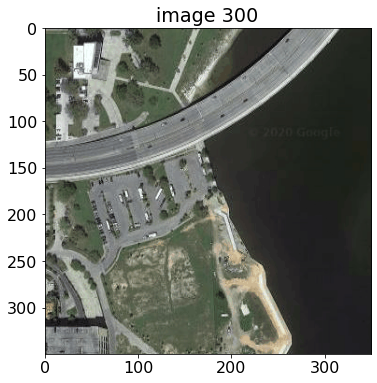

Wild Camping_closed
MS
Established Campground_closed
MS
Water_closed
MS
Showers_closed
MS
Wild Camping_deleted
MS
Pulling image 439, total API requests so far = 0
satimg_MS_439_Wild Camping_deleted_17_34.532268_-89.45814200000001.png
waiting for: 2 seconds
Informal Campsite_deleted
MS
Pulling image 759, total API requests so far = 0
satimg_MS_759_Informal Campsite_deleted_17_30.462661999999998_-88.435347.png
waiting for: 5 seconds


In [ ]:
for name, state in zip(names, state_dfs):
    for category in categories:
        print(category)
        tempdf = state[state['Category'] == category]
        #tempdf.info()
        print(name)
        my_funcs.download_images(gmaps, tempdf, max_requests=max_requests, zoomlevel=17, prefix=f'{name}', out_path=f"../data/sat_images/sites_{name}/{category}/", n_requests=n_requests)